In [6]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [8]:
from qiskit.chemistry.drivers import PySCFDriver, UnitsType, Molecule
from qiskit.chemistry.transformations import FermionicTransformation, FermionicQubitMappingType

molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., 0.735]]],
                     charge=0, multiplicity=1)
driver = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM, basis='sto3g')
transformation = FermionicTransformation(qubit_mapping=FermionicQubitMappingType.JORDAN_WIGNER)

Traceback (most recent call last):
  File "/tmp/ipykernel_164/58763836.py", line 1, in <module>
    from qiskit.chemistry.drivers import PySCFDriver, UnitsType, Molecule
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/drivers/__init__.py", line 144, in <module>
    from .pyscfd import PySCFDriver, InitialGuess
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/drivers/pyscfd/__init__.py", line 26, in <module>
    from .pyscfdriver import PySCFDriver, InitialGuess
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/drivers/pyscfd/pyscfdriver.py", line 25, in <module>
    from .integrals import compute_integrals
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/drivers/pyscfd/integrals.py", line 25, in <module>
    from pyscf import gto, scf, ao2mo
  File "/opt/conda/lib/python3.8/site-packages/pyscf/__init__.py", line 71, in <module>
    from pyscf import lib
  File "/opt/conda/lib/python3.8/site-packages/pyscf/lib/__init__.py", lin

In [ ]:
from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.chemistry.algorithms.ground_state_solvers.minimum_eigensolver_factories import VQEUCCSDFactory

vqe_solver = VQEUCCSDFactory(QuantumInstance(Aer.get_backend('statevector_simulator')))

In [2]:
from qiskit.chemistry.algorithms.ground_state_solvers import GroundStateEigensolver

calc = GroundStateEigensolver(transformation, vqe_solver)
res = calc.solve(driver)

print(res)

Traceback (most recent call last):
  File "/tmp/ipykernel_164/3442127541.py", line 1, in <module>
    from qiskit.chemistry.algorithms.ground_state_solvers import GroundStateEigensolver
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/algorithms/__init__.py", line 141, in <module>
    from .excited_states_solvers import (ExcitedStatesEigensolver, ExcitedStatesSolver, QEOM,
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/algorithms/excited_states_solvers/__init__.py", line 15, in <module>
    from .excited_states_solver import ExcitedStatesSolver
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/algorithms/excited_states_solvers/excited_states_solver.py", line 18, in <module>
    from qiskit.chemistry.drivers import BaseDriver
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemistry/drivers/__init__.py", line 144, in <module>
    from .pyscfd import PySCFDriver, InitialGuess
  File "/opt/conda/lib/python3.8/site-packages/qiskit/chemist

In [9]:
from qiskit.aqua.algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()

calc = GroundStateEigensolver(transformation, numpy_solver)
res = calc.solve(driver)
print(res)

Traceback (most recent call last):
  File "/tmp/ipykernel_164/3386368594.py", line 5, in <module>
    calc = GroundStateEigensolver(transformation, numpy_solver)
NameError: name 'GroundStateEigensolver' is not defined

Use %tb to get the full traceback.


In [4]:
import numpy as np

distances = np.linspace(0.25, 3.0, 30)
exact_energies = []
vqe_energies = []
for dist in distances:
    molecule = Molecule(geometry=[['H', [0., 0., 0.]],
                              ['H', [0., 0., dist]]],
                     charge=0, multiplicity=1)
    driver = PySCFDriver(molecule = molecule, unit=UnitsType.ANGSTROM, basis='sto3g')
    # Exact solver
    calc = GroundStateEigensolver(transformation, numpy_solver)
    res = calc.solve(driver)
    exact_energies.append(res.total_energies)
    # VQE
    calc = GroundStateEigensolver(transformation, vqe_solver)
    res = calc.solve(driver)
    vqe_energies.append(res.total_energies)
    

Traceback (most recent call last):
  File "/tmp/ipykernel_164/1639551592.py", line 7, in <module>
    molecule = Molecule(geometry=[['H', [0., 0., 0.]],
NameError: name 'Molecule' is not defined

Use %tb to get the full traceback.


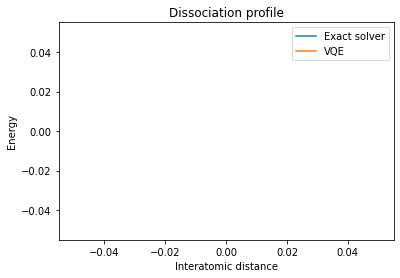

In [5]:
import matplotlib.pyplot as plt

plt.plot(exact_energies, label = 'Exact solver')
plt.plot(vqe_energies, label = 'VQE')
plt.title('Dissociation profile')
plt.xlabel('Interatomic distance')
plt.legend()
plt.ylabel('Energy');